<a href="https://colab.research.google.com/github/dedemasutti/data-science/blob/main/An%C3%A1lise_de_Dados_e_Machine_learning_aplicado_a_Recursos_Humanos(Churn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


dados = pd.read_csv('/content/employee_churn_dataset.csv')

In [11]:
dados.head()

,id,avaliacao_desempenho,satisfacao_trabalho,salario,tempo_servico,churn
0,1,0.75,0.8,6000,2,0
1,2,0.90,0.7,8000,4,0
2,3,0.60,0.6,5000,1,1
3,4,0.85,0.5,7500,3,0
4,5,0.70,0.9,7000,2,1


In [20]:
dados.value_counts('churn')

churn
0    21
1     9
dtype: int64

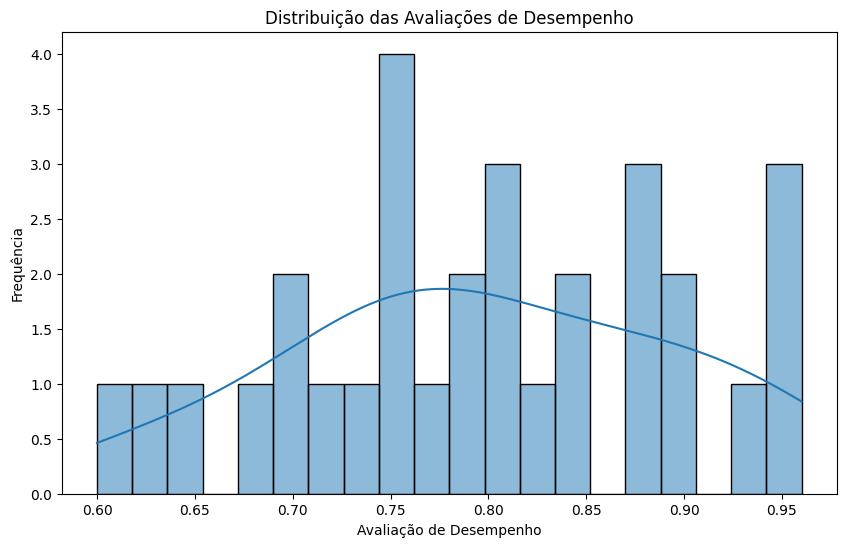

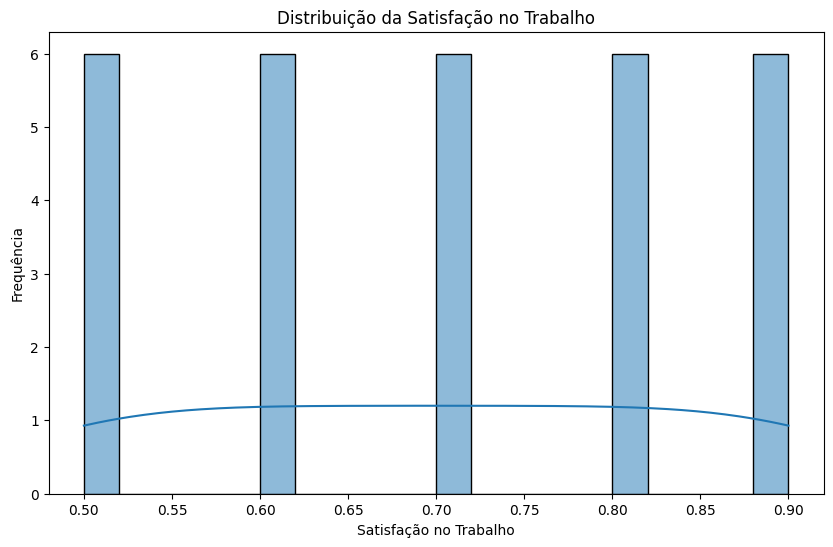

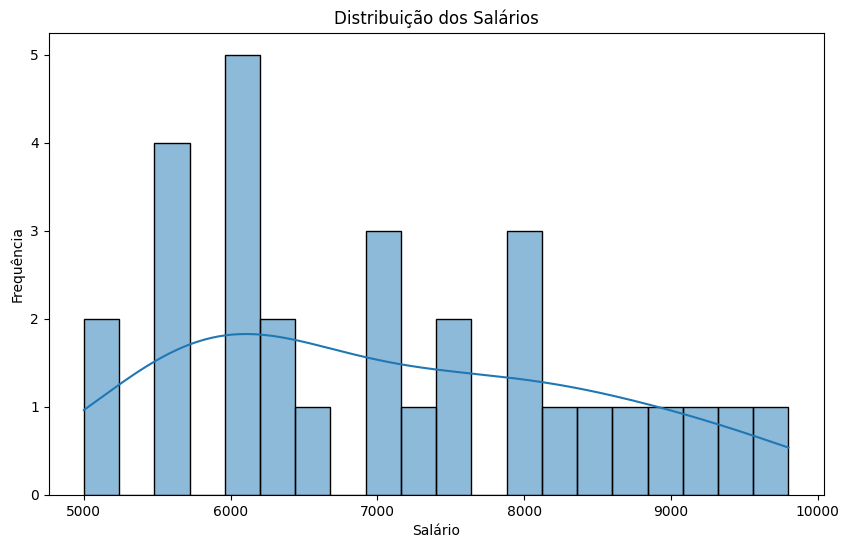

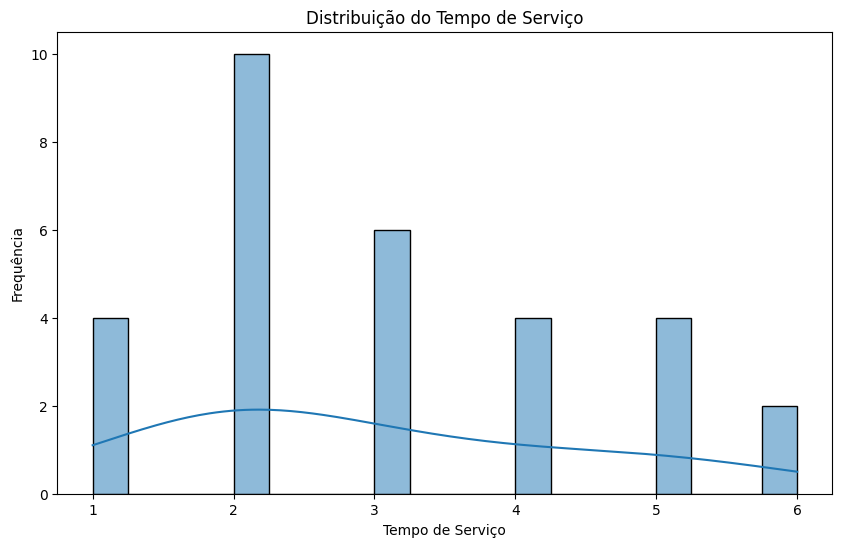

In [12]:
# Distribuição das avaliações de desempenho
plt.figure(figsize=(10, 6))
sns.histplot(dados['avaliacao_desempenho'], bins=20, kde=True)
plt.title('Distribuição das Avaliações de Desempenho')
plt.xlabel('Avaliação de Desempenho')
plt.ylabel('Frequência')
plt.show()

# Distribuição da satisfação no trabalho
plt.figure(figsize=(10, 6))
sns.histplot(dados['satisfacao_trabalho'], bins=20, kde=True)
plt.title('Distribuição da Satisfação no Trabalho')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Frequência')
plt.show()

# Distribuição dos salários
plt.figure(figsize=(10, 6))
sns.histplot(dados['salario'], bins=20, kde=True)
plt.title('Distribuição dos Salários')
plt.xlabel('Salário')
plt.ylabel('Frequência')
plt.show()

# Distribuição do tempo de serviço
plt.figure(figsize=(10, 6))
sns.histplot(dados['tempo_servico'], bins=20, kde=True)
plt.title('Distribuição do Tempo de Serviço')
plt.xlabel('Tempo de Serviço')
plt.ylabel('Frequência')
plt.show()


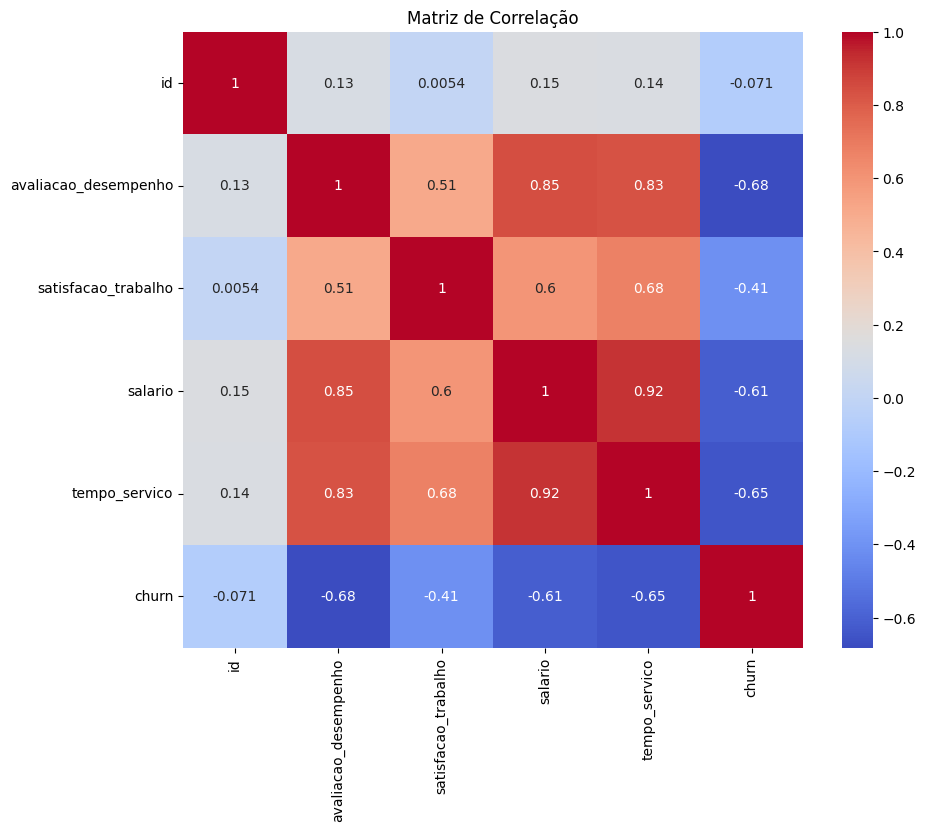

In [14]:
correlation_matrix = dados.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


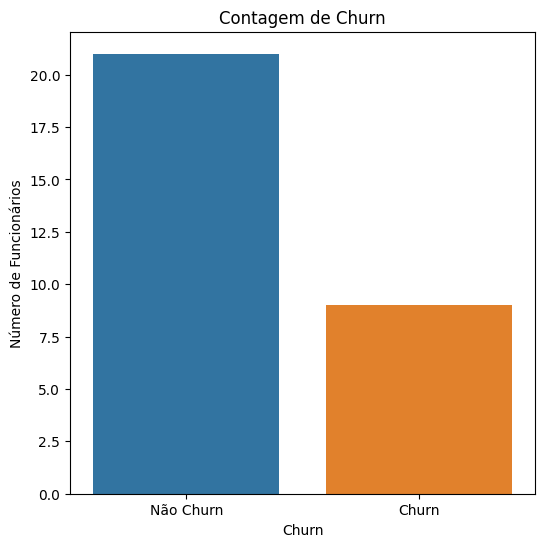

In [17]:
churn_counts = dados['churn'].value_counts()
plt.figure(figsize=(6, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values)
plt.title('Contagem de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Funcionários')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()


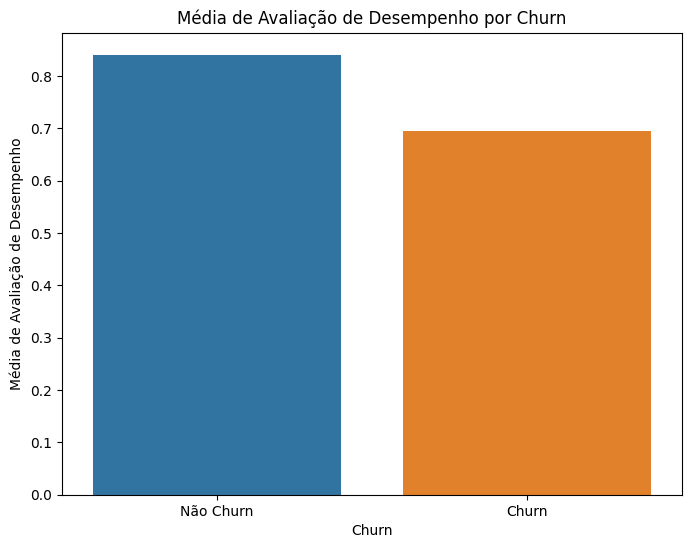

In [21]:
churn_avg_perform = dados.groupby('churn')['avaliacao_desempenho'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_avg_perform.index, y=churn_avg_perform.values)
plt.title('Média de Avaliação de Desempenho por Churn')
plt.xlabel('Churn')
plt.ylabel('Média de Avaliação de Desempenho')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()


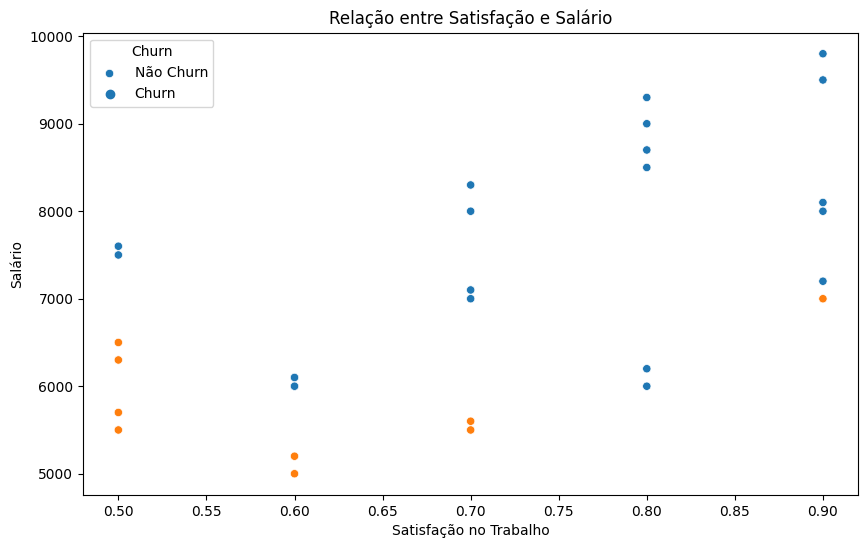

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfacao_trabalho', y='salario', hue='churn', data=dados)
plt.title('Relação entre Satisfação e Salário')
plt.xlabel('Satisfação no Trabalho')
plt.ylabel('Salário')
plt.legend(title='Churn', labels=['Não Churn', 'Churn'])
plt.show()


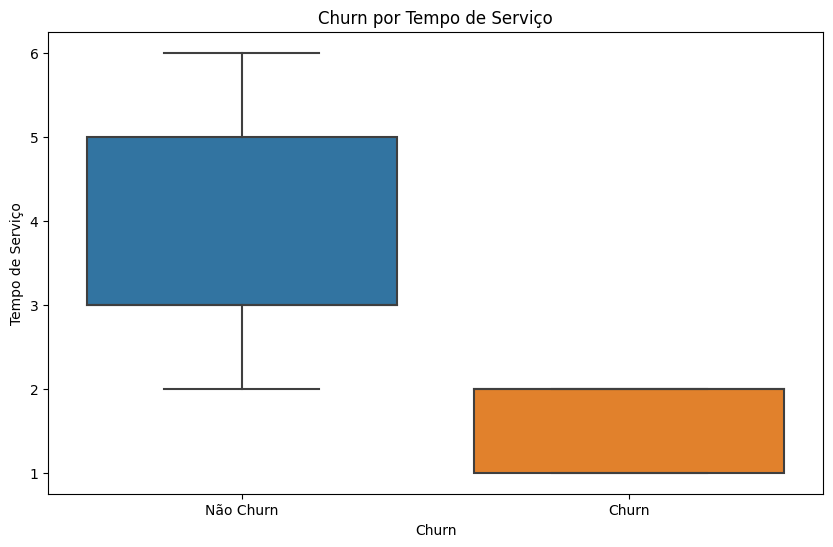

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tempo_servico', data=dados)
plt.title('Churn por Tempo de Serviço')
plt.xlabel('Churn')
plt.ylabel('Tempo de Serviço')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()


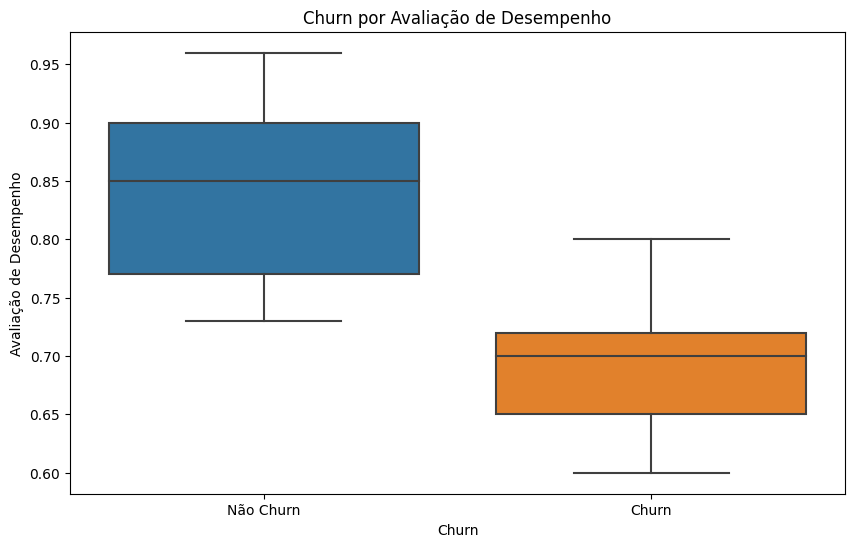

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='avaliacao_desempenho', data=dados)
plt.title('Churn por Avaliação de Desempenho')
plt.xlabel('Churn')
plt.ylabel('Avaliação de Desempenho')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()


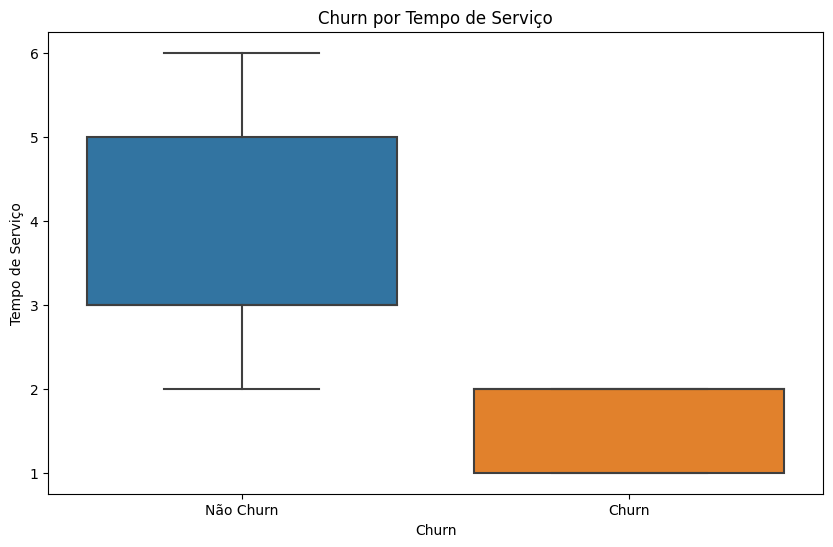

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tempo_servico', data=dados)
plt.title('Churn por Tempo de Serviço')
plt.xlabel('Churn')
plt.ylabel('Tempo de Serviço')
plt.xticks([0, 1], ['Não Churn', 'Churn'])
plt.show()

In [15]:
# Preparação dos dados (X são as features e y é a variável alvo)
X = dados.drop('churn', axis=1)
y = dados['churn']

# Divisão em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Treinamento do modelo
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

